In [4]:
import matplotlib.pyplot as plt
import pandas_datareader as web
import numpy as np
import pandas as pd
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go
import yfinance as yf
from stldecompose import decompose

/Users/taylanerdogan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Veri Okuma Getirme

In [9]:
df = yf.download('DOGUB.IS',start='2020-06-01',progress=False)
df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,2.29,2.32,2.26,2.31,2.31,2226554
2020-06-02,2.31,2.35,2.24,2.30,2.30,2496724
2020-06-03,2.31,2.34,2.28,2.31,2.31,2414478
2020-06-04,2.33,2.34,2.29,2.31,2.31,2183754
2020-06-05,2.32,2.35,2.27,2.33,2.33,2728973
...,...,...,...,...,...,...
2020-12-21,3.67,3.67,3.49,3.57,3.57,714383
2020-12-22,3.57,3.85,3.55,3.72,3.72,937431
2020-12-23,3.72,3.74,3.54,3.66,3.66,527629


## Veriyi Görselleştirme MUM GRAFİK

In [10]:
fig = go.Figure(data = [go.Candlestick(x=df.index, 
                                       open=df['Open'],
                                       close=df['Close'],
                                       high=df['High'],
                                       low=df['Low'])])


In [11]:
fig.show()

## Zaman Eğrisi

<ipython-input-12-bb9f7b1b23c4>:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



([<matplotlib.axis.XTick at 0x7f8ff9130e80>,
 [Text(1, 0, '1'), Text(91, 0, '91')])

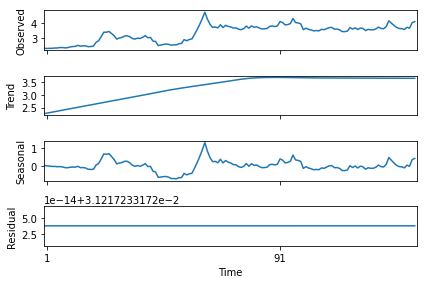

In [12]:
df_close = df['Close']
decomp = decompose(df_close.values)
decomp.plot().show()

positions = np.arange(1, len(df_close), 90)
labels = positions
plt.xticks(positions,labels)

In [13]:
seasonal = decomp.seasonal
trend = decomp.trend
residual = decomp.resid

In [14]:
residual

array([0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121723,
       0.03121723, 0.03121723, 0.03121723, 0.03121723, 0.03121

In [15]:
## Hareketli Ortalama 

In [16]:
close_app = df.iloc[len(df)//2:,3]
close_app

Date
2020-09-15    3.74
2020-09-16    3.67
2020-09-17    3.68
2020-09-21    3.59
2020-09-22    3.56
              ... 
2020-12-21    3.57
2020-12-22    3.72
2020-12-23    3.66
2020-12-24    4.03
2020-12-25    4.10
Name: Close, Length: 72, dtype: float64

In [17]:
rolling_app5 = close_app.rolling(window=5).mean()
rolling_app14 = close_app.rolling(window=13).mean()
rolling_app21 = close_app.rolling(window=21).mean()

In [18]:
MAs = pd.concat([close_app,rolling_app5,rolling_app14,rolling_app21],axis=1)


In [19]:
MAs.columns = ['Close','short','mid','long']
MAs.dropna(axis=0,inplace=True)
MAs.head(30)

,Close,short,mid,long
Date,,,,
2020-10-14,4.04,3.906,3.779231,3.736190
2020-10-15,3.88,3.920,3.784615,3.742857
2020-10-16,3.90,3.946,3.798462,3.753810
2020-10-19,3.97,3.978,3.815385,3.767619
2020-10-20,4.31,4.020,3.864615,3.801905
2020-10-21,4.04,4.020,3.897692,3.824762
2020-10-22,4.01,4.046,3.927692,3.842857
2020-10-23,3.95,4.056,3.951538,3.850000
2020-10-26,3.56,3.974,3.934615,3.845238


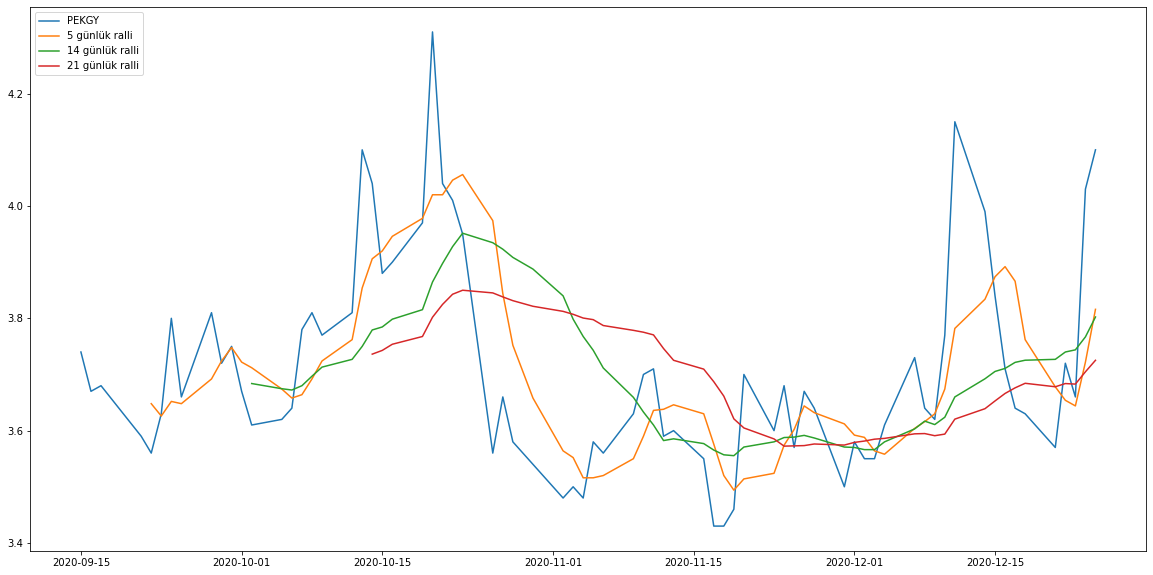

In [20]:
fig,ax = plt.subplots(figsize =(20,10))
ax.plot(close_app.index,close_app,label='PEKGY')
ax.plot(rolling_app5.index,rolling_app5,label='5 günlük ralli')
ax.plot(rolling_app14.index,rolling_app14,label='14 günlük ralli')
ax.plot(rolling_app21.index,rolling_app21,label='21 günlük ralli')
ax.legend(loc= 'upper left')

In [21]:
def buy_sell(data, perc=50):
    buy_sell=[]
    buy_signal = []
    sell_signal=[]
    flag=42
    
    sm = np.abs(np.percentile(np.array(data['short']-data['mid']),perc))
    sl = np.abs(np.percentile(np.array(data['short']-data['long']),perc))
    
    for i in range(0,len(data)):
        if (data['short'][i] > data['mid'][i] + sm) & (data['short'][i] > data['long'][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data['Close'][i])
                buy_sell.append(data['Close'][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data['short'][i] < data['mid'][i]-sm) & (data['short'][i]< data['long'][i]-sl):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data['Close'][i])
                buy_sell.append(data['Close'][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
            
    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    pos = 0
    neg= 0
    for i in range(len(operations)):
        if operations[i] < 0 :
            neg = i
            break
        if operations[i] > 0:
            pos = i - 1
            break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
    return (buy_signal,sell_signal,PL)

In [22]:
m = buy_sell(MAs)
MAs['BUY'] = m[0]
MAs['SELL'] = m[1]

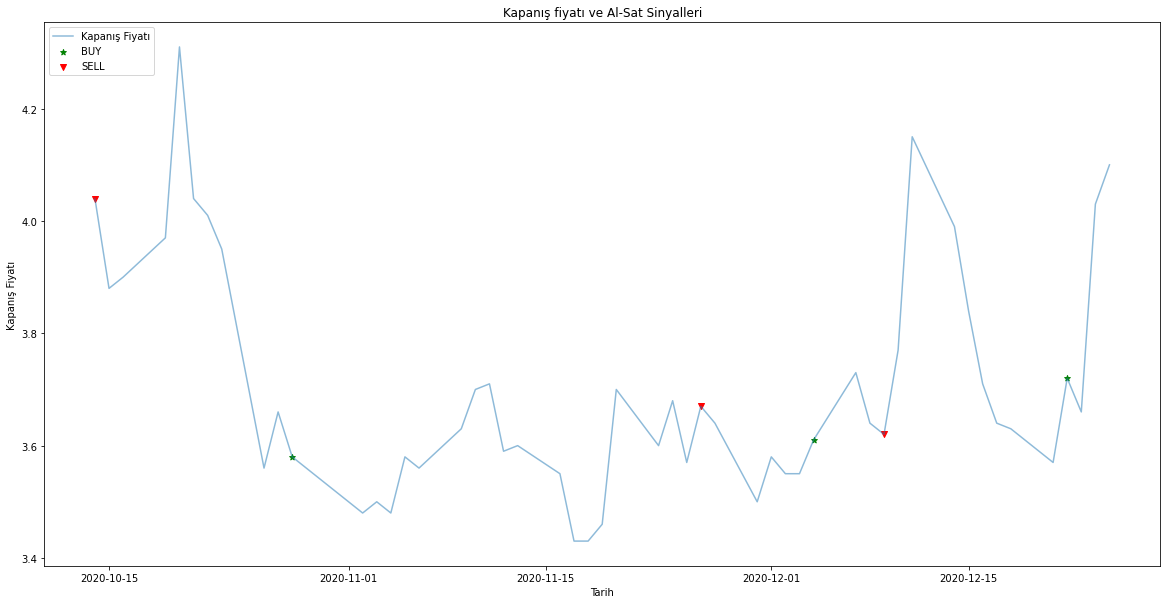

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(MAs.index,MAs['BUY'],color='green',label='BUY',marker='*',alpha=1)
plt.scatter(MAs.index,MAs['SELL'],color='red',label='SELL',marker='v',alpha=1)
plt.plot(MAs['Close'],label='Kapanış Fiyatı',alpha=0.5)
plt.title('Kapanış fiyatı ve Al-Sat Sinyalleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend(loc = 'upper left')
plt.show()